Kütüphaneleri Ekleme

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # Eğitim ve test verileri bölünmemiş durumdadır.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Veri Yükleme

In [223]:
df1_needs_reset=False

In [224]:
df1=pd.read_csv("debernardi_et_al_2020_data.csv",sep=",")

## Boş Hücreli Satırların Çıkarılması

In [225]:
# Gereksiz sütunların çıkarılması
df1=df1.drop(columns=['sample_id','patient_cohort','sample_origin'])
# Boş değerli hücrelerin bulunduğu sütunların çıkarılması
df1=df1.drop(columns=['stage','benign_sample_diagnosis','plasma_CA19_9','REG1A'])

In [226]:
if df1.isnull().sum().sum()>0:
    ilk_durum=len(df1)
    df1.dropna(axis=0,how='any',inplace=True)
    son_durum=len(df1)
    df1_trn_needs_reset=True
    df1_tst_needs_reset=True
    print("df1 içerisindeki",ilk_durum-son_durum,"adet boş hücreli satır çıkarıldı.")

# print(df1["..."].isnull())

## Tekrar Eden Satırların Çıkarılması

In [227]:
if df1.duplicated().sum()>0:
    ilk_durum=len(df1)
    df1.drop_duplicates(inplace=True)
    son_durum=len(df1)
    df1_trn_needs_reset=True
    df1_tst_needs_reset=True
    print("df1 içerisindeki",ilk_durum-son_durum,"adet tekrar satırları çıkarıldı.")

# print(df1[df1.duplicated()])

## Veride Aşırılık Kontrolü

In [228]:
np.seterr(divide='ignore',invalid='ignore') # Aşırı veri kontrol edilirken bölme işlemindeki tanımsız durumların gözardı edilmesini sağlar.

for column in df1:
    if pd.to_numeric(df1[column],errors='coerce').notnull().all()==True:
        print("df1",column,"için:")
        # Z Score Kullanarak Aşırılık Kontrolü
        df1_column_zscore=np.abs(zscore(df1[column]))
        print("Büyük Z Score Yerleri",np.where(df1_column_zscore>8))
        # Çeyreklik (Quantile) Yöntemi
        #df1_column_mean=df1[column].mean()
        #df1_column_median=np.median(df1[column])
        #df1_column_std=df1[column].std()
        #print("Mean (Ortalama)",df1_column_mean)
        #print("Median (Ortanca)",df1_column_median)
        #print("Mean ve Median Farkı",np.abs(df1_column_mean-df1_column_median))
        #print("Standart Sapma",df1_column_std)
        #df1_column_q_low=df1[column].quantile(0.025)
        #df1_column_q_high=df1[column].quantile(0.975)
        #if df1_column_q_low>0:
        #    df1_column_m_over_q_low=df1_column_median/df1_column_q_low
        #    if df1_column_m_over_q_low!=1:
        #        print("Düşük Çeyreklik",df1_column_q_low,"değeri ortanca değerden",df1_column_m_over_q_low,"kat küçüktür.")
        #        print(df1[df1[column]<df1_column_q_low])
        #    else:
        #        print("Düşük Çeyreklik",df1_column_q_low,"değeri ortanca değere eşittir.")
        #else:
        #    print("Düşük Çeyreklik değeri yoktur.")
        #if df1_column_q_high>0:
        #    if df1_column_median!=0:
        #        df1_column_q_high_over_m=df1_column_q_high/df1_column_median
        #        if df1_column_q_high_over_m!=1:
        #            print("Yüksek Çeyreklik",df1_column_q_high,"değeri ortanca değerden",df1_column_q_high_over_m,"kat büyüktür.")
        #            print(df1[df1[column]>df1_column_q_high])
        #        else:
        #            print("Yüksek Çeyreklik",df1_column_q_high,"değeri ortanca değere eşittir.")
        #    else:
        #        print("Yüksek Çeyreklik",df1_column_q_high,"değeri ortanca değerden aynı miktarda büyüktür.")
        #else:
        #    print("Yüksek Çeyreklik değeri yoktur.")

print("Veriseti 1 - Aşırı veri düzeltme işlemi gerekmiyor.")

df1 age için:
Büyük Z Score Yerleri (array([], dtype=int64),)
df1 diagnosis için:
Büyük Z Score Yerleri (array([], dtype=int64),)
df1 creatinine için:
Büyük Z Score Yerleri (array([], dtype=int64),)
df1 LYVE1 için:
Büyük Z Score Yerleri (array([], dtype=int64),)
df1 REG1B için:
Büyük Z Score Yerleri (array([], dtype=int64),)
df1 TFF1 için:
Büyük Z Score Yerleri (array([487], dtype=int64),)
Veriseti 1 - Aşırı veri düzeltme işlemi gerekmiyor.


## İndeksleri Aritmetik Sıralatma

In [230]:
try:
    if df1_needs_reset:
        df1.reset_index(drop=True,inplace=True) # drop=True ile eski indeksler sütunu eklenmez,inplace=True ile asıl dataframe değiştirilir
        print("df1_trn indeksleri aritmetik olarak sıralandı.")
except:
    pass

## Verinin Baş Kısmı

In [231]:
print(df1.head())

   age sex  diagnosis  creatinine     LYVE1      REG1B        TFF1
0   33   F          1     1.83222  0.893219   52.94884  654.282174
1   81   F          1     0.97266  2.037585   94.46703  209.488250
2   51   M          1     0.78039  0.145589  102.36600  461.141000
3   61   M          1     0.70122  0.002805   60.57900  142.950000
4   62   M          1     0.21489  0.000860   65.54000   41.088000


## Sütun Başlıklarını Küçük Harfli Yapma

In [232]:
df1.columns=[col.lower() for col in df1.columns]

## Sütun Başlıklarındaki Boşlukları Alttan Çizgi Yapma

In [233]:
df1.columns=df1.columns.str.replace(' ','_')

## Sütun Başlıklarını Yeniden Adlandırma

In [234]:
df1.columns=['yas','cinsiyet','teshis','kreatinin','LYVE1','REG1B','TFF1']
print(df1.info()) # Genel bilgiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yas        590 non-null    int64  
 1   cinsiyet   590 non-null    object 
 2   teshis     590 non-null    int64  
 3   kreatinin  590 non-null    float64
 4   LYVE1      590 non-null    float64
 5   REG1B      590 non-null    float64
 6   TFF1       590 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 32.4+ KB
None


## Hücre Değerlerini Yeniden Adlandırma

In [235]:
df1["teshis"].replace({1:-1,2:0,3:1},inplace=True)
df1["cinsiyet"].replace({"F":0,"M":1},inplace=True)

## Veri Tipi Dönüşümü

In [236]:
print(df1.dtypes)
df1["yas"]=df1["yas"].astype('uint8')
df1["cinsiyet"]=df1["cinsiyet"].astype('uint8')
df1["teshis"]=df1["teshis"].astype('int8')
print(df1.info())

yas            int64
cinsiyet       int64
teshis         int64
kreatinin    float64
LYVE1        float64
REG1B        float64
TFF1         float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yas        590 non-null    uint8  
 1   cinsiyet   590 non-null    uint8  
 2   teshis     590 non-null    int8   
 3   kreatinin  590 non-null    float64
 4   LYVE1      590 non-null    float64
 5   REG1B      590 non-null    float64
 6   TFF1       590 non-null    float64
dtypes: float64(4), int8(1), uint8(2)
memory usage: 20.3 KB
None


## Veri Hakkında Sayısal Bilgiler

In [237]:
print(df1.describe())

              yas    cinsiyet      teshis   kreatinin       LYVE1  \
count  590.000000  590.000000  590.000000  590.000000  590.000000   
mean    59.079661    0.493220    0.027119    0.855383    3.063530   
std     13.109520    0.500378    0.804873    0.639028    3.438796   
min     26.000000    0.000000   -1.000000    0.056550    0.000129   
25%     50.000000    0.000000   -1.000000    0.373230    0.167179   
50%     60.000000    0.000000    0.000000    0.723840    1.649862   
75%     69.000000    1.000000    1.000000    1.139482    5.205037   
max     89.000000    1.000000    1.000000    4.116840   23.890323   

             REG1B          TFF1  
count   590.000000    590.000000  
mean    111.774090    597.868722  
std     196.267110   1010.477245  
min       0.001104      0.005293  
25%      10.757216     43.961000  
50%      34.303353    259.873974  
75%     122.741013    742.736000  
max    1403.897600  13344.300000  


## Sayısal Verilerin Normalizasyonu

In [238]:
# Sayısal Verilerin 0-1 Aralığına Çekilmesi

ozellikler = ['kreatinin','LYVE1','REG1B','TFF1']
for oge in ozellikler:
    if pd.to_numeric(df1[oge],errors='coerce').notnull().all()==True:
        df1_scaler=df1[oge]
        df1[oge]=(df1_scaler-np.min(df1_scaler))/(np.max(df1_scaler)-np.min(df1_scaler))
        print("df1",oge,"için normalizasyon yapıldı.")

df1 kreatinin için normalizasyon yapıldı.
df1 LYVE1 için normalizasyon yapıldı.
df1 REG1B için normalizasyon yapıldı.
df1 TFF1 için normalizasyon yapıldı.


## Verideki Benzersiz Sonuçlar

In [239]:
for column in df1:
    print("df1",column,"için",len(df1[column].unique()), "adet benzersiz öge vardır:")
    print(df1[column].unique())

df1 yas için 63 adet benzersiz öge vardır:
[33 81 51 61 62 53 70 58 59 56 77 71 49 60 69 55 28 54 50 40 74 63 47 45
 35 30 48 44 41 89 87 66 36 67 73 83 65 64 26 34 57 46 38 84 68 37 52 78
 43 76 72 32 39 29 82 31 75 79 42 80 88 86 85]
df1 cinsiyet için 2 adet benzersiz öge vardır:
[0 1]
df1 teshis için 3 adet benzersiz öge vardır:
[-1  0  1]
df1 kreatinin için 198 adet benzersiz öge vardır:
[0.43732591 0.22562674 0.17827298 0.15877437 0.03899721 0.19498607
 0.13927577 0.20612813 0.10584958 0.13649025 0.05849582 0.24512535
 0.19777159 0.45682451 0.21169916 0.11142061 0.08913649 0.18384401
 0.30362117 0.29247911 0.22005571 0.17548747 0.06406685 0.17270195
 0.32033426 0.04735376 0.27855153 0.1643454  0.28690808 0.27576602
 0.01949861 0.28412256 0.48467967 0.02506964 0.06963788 0.01114206
 0.13370474 0.13091922 0.1448468  0.00278552 0.29805014 0.22284123
 0.08356546 0.09192201 0.06685237 0.20334262 0.08077994 0.2005571
 0.28969359 0.00835655 0.0362117  0.01392758 0.01671309 0.09749304
 0.

## Verideki Kategorik Bilgileri Dönüştürme

In [240]:
# Tekil bir kategorik veriyi dönüştürme:
df1["kadin"]=["1" if row=="0" else "0" for row in df1["cinsiyet"]]
df1["kadin"]=df1["kadin"].astype('uint8')
df1.rename(columns={"cinsiyet":"erkek"},inplace=True)
print(df1.head())

   yas  erkek  teshis  kreatinin     LYVE1     REG1B      TFF1  kadin
0   33      0      -1   0.437326  0.037383  0.037715  0.049030      0
1   81      0      -1   0.225627  0.085284  0.067288  0.015698      0
2   51      1      -1   0.178273  0.006089  0.072915  0.034557      0
3   61      1      -1   0.158774  0.000112  0.043150  0.010712      0
4   62      1      -1   0.038997  0.000031  0.046684  0.003079      0


## Sütunların Sıralanması (En Son Sütunun Sonuç Yapılması)

In [241]:
# Sütun sıralama fonksiyonunun yazılması.
def movecol(df,cols_to_move=[],ref_col='',place='After'):
    cols=df.columns.tolist()
    if place=='After':
        seg1=cols[:list(cols).index(ref_col)+1]
        seg2=cols_to_move
    if place=='Before':
        seg1=cols[:list(cols).index(ref_col)]
        seg2=cols_to_move+[ref_col]
    seg1=[i for i in seg1 if i not in seg2]
    seg3=[i for i in cols if i not in seg1+seg2]
    return(df[seg1+seg2+seg3])

In [242]:
# Sütun sıralaması.
df1=movecol(df1,cols_to_move=['teshis'],ref_col='TFF1',place='After')
print("df1 teshis sütunu sona alındı.")

df1=movecol(df1,cols_to_move=['erkek','kadin'],ref_col='teshis',place='Before')
print("df1 cinsiyet sütunları sonuç sütununun önüne alındı.")

df1 teshis sütunu sona alındı.
df1 cinsiyet sütunları sonuç sütununun önüne alındı.


## Verinin Genel Bilgileri

In [243]:
print("Veriseti 1")
print(df1.info())

Veriseti 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yas        590 non-null    uint8  
 1   kreatinin  590 non-null    float64
 2   LYVE1      590 non-null    float64
 3   REG1B      590 non-null    float64
 4   TFF1       590 non-null    float64
 5   erkek      590 non-null    uint8  
 6   kadin      590 non-null    uint8  
 7   teshis     590 non-null    int8   
dtypes: float64(4), int8(1), uint8(3)
memory usage: 20.9 KB
None


## İşlenecek ve Denenecek Veriyi Belirleme

In [244]:
df1_x=df1.iloc[:,0:7].values
print(df1_x.shape)

(590, 7)


In [245]:
df1_Y=df1.iloc[:,7:8].values
df1_y=np.reshape(df1_Y,-1)
print(df1_y.shape)

(590,)


# YSA Uygulaması

In [246]:
df1_x_ysa_trn,df1_x_ysa_tst,df1_y_ysa_trn,df1_y_ysa_tst=train_test_split(df1_x,df1_y,test_size=0.2,random_state=1) # test_size ile yüzdelik bölünme belirlendi,her seferde aynı seçim yapması için random_state belirlendi.

In [247]:
print("Veriseti 1 - Eğitim Verisi")
print(df1_x_ysa_trn.shape)
print(df1_y_ysa_trn.shape)
print("Veriseti 1 - Test Verisi")
print(df1_x_ysa_tst.shape)
print(df1_y_ysa_tst.shape)

Veriseti 1 - Eğitim Verisi
(472, 7)
(472,)
Veriseti 1 - Test Verisi
(118, 7)
(118,)


In [248]:
# Çıktı verilerini vektörden matrise dönüştürme
df1_y_ysa_tst=df1_y_ysa_tst.reshape(-1,1)
df1_y_ysa_trn=df1_y_ysa_trn.reshape(-1,1)

In [278]:
# Veri bilgilerini öğrenme
print("df1 x ysa train:",df1_x_ysa_trn.shape)
print("df1 y ysa train:",df1_y_ysa_trn.shape)
print("df1 x ysa test:",df1_x_ysa_tst.shape)
print("df1 y ysa test:",df1_y_ysa_tst.shape)

df1 x ysa train: (472, 7)
df1 y ysa train: (472, 1)
df1 x ysa test: (118, 7)
df1 y ysa test: (118, 1)


In [251]:
# İlk ağırlıkları ve biası tanımlayan fonksiyon
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01) # girilen boyuta göre 0.01 verisinden oluşan ağırlık matrisi oluşturur
    b = 0.0 # float olarak sıfır değerinde bias oluşturur
    return w,b

In [252]:
# Transfer fonksiyonunun oluşturulması (ara çıktı)
def transfer(x,w,b):
    z=np.dot(x,w)+b # Toplama fonksiyonu
    return z

In [253]:
# Aktivasyon fonksiyonunun oluşturulması (ön çıktı)
def activation(z):
    y_head=1/(1+np.exp(-z)) # Sigmoid/Logistic fonksiyonu
    return y_head

In [254]:
# İleri ve geri yayılım fonksiyonunun oluşturulması
def forward_backward_propagation(w,b,x_train,y_train):
    # İleri yayılım (Maliyet fonksiyonu)
    z=transfer(x_train,w,b) # Ara çıktı olarak (455,1) matris elde edilecek
    y_head=activation(z) # Her z için ön çıktı hesaplama
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) # Kayıp/Hata
    cost=(np.sum(loss))/x_train.shape[0] # Maliyet
    
    # Geri yayılım (Türev ile eğimler bulunur)
    # Türevi alınan ağırlıklar ve bias hesaplanır.
    derivative_weight=(np.dot(x_train.T,((y_head-y_train))))/x_train.shape[0] 
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[0]                 
    # Döndürmek için bir sözlüğe eklenir 
    gradients={"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    
    return cost,gradients

In [255]:
# Geri yayılım doğrultusunda ağırlıkların ve biasın güncellenmesi
def update(w,b,x_train,y_train,learning_rate,number_of_iterarion):
    # Her 1 adımda ve her 10 adımda depolaması için bir list oluşturma
    cost_list01=[]
    cost_list10=[]
    # İterasyon sayısını tutmak içinde bir liste oluşturma
    index=[]
    
    # Gadyan azalmalı optimizasyon algoritması
    for i in range(number_of_iterarion):
        cost,gradients=forward_backward_propagation(w,b,x_train,y_train) # Türevleri aldırma
        w=w-learning_rate*gradients["derivative_weight"] # Yeni ağırlıkları hesaplatma
        b=b-learning_rate*gradients["derivative_bias"] # Yeni biası hesaplatma
        cost_list01.append(cost) # Her 1 adımda maliyet çıktısının depolanması
        if i%10==0:
            index.append(i)
            cost_list10.append(cost) # Her 10 adımda maliyet çıktısının depolanması
            print("Cost after iteration %i: %f" %(i,cost))
            
    # Ağırlıkları ve biası güncelle
    parameters={"weight":w,"bias":b}
    
    # Her 10 adımda maliyet çıktısının grafikle gösterilmesi
    plt.plot(index,cost_list10)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters,gradients,cost_list01

In [256]:
# Sonuç çıktısını oluşturmak için tahmin fonksiyonu
def predict(w,b,x_test):
    z=transfer(x_test,w,b)
    y_head=activation(z) # Ön çıktı hesaplama
    
    y_prediction=np.zeros((x_test.shape[0],1)) # Ön çıktıdan tahminde bulunma
    
    for i in range(y_head.shape[0]):
        if y_head[i,0]<=0.5:
            y_prediction[i,0]=0
        else:
            y_prediction[i,0]=1

    return y_prediction

In [257]:
# Tüm fonksiyonların birleştirildiği ana fonksiyonun oluşturulması
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    # Initialize (İlk Yükleme)
    dimension=x_train.shape[1] 
    w,b=initialize_weights_and_bias(dimension)
    
    # Değerlendirme yapılarak yeni parametrelerin belirlenmesi
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,num_iterations)
    
    # Yeni parametreler kullanılarak test verisinde tahminin yapılması
    y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)

    # Accuracy (Doğruluk) [doğru tahminler/test sayısı]
    print("Test Accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    
    return y_prediction_test,y_test

Cost after iteration 0: 0.990071
Cost after iteration 10: 24.795124
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: 3.078132
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan
Cost after iteration 100: nan
Cost after iteration 110: nan
Cost after iteration 120: 23.739583
Cost after iteration 130: nan
Cost after iteration 140: nan
Cost after iteration 150: nan
Cost after iteration 160: nan
Cost after iteration 170: 2.022023
Cost after iteration 180: nan
Cost after iteration 190: nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


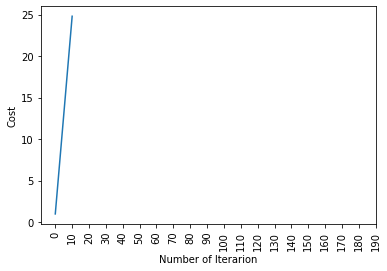

Test Accuracy: 35.59322033898306 %


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [258]:
df1_y_ysa_pred,df1_y_ysa_true=logistic_regression(df1_x_ysa_trn,df1_y_ysa_trn,df1_x_ysa_tst,df1_y_ysa_tst,learning_rate=1,num_iterations=200)  

In [259]:
# Sklearn ile lineer regresyon yapılsaydı
df1_linreg=LogisticRegression(solver="newton-cg")
df1_linreg.fit(df1_x_ysa_trn,df1_y_ysa_trn.ravel()) # Matris olarak ayarlanan y çıktısı tekrardan vektöre geri döndürüldü
print("Skor:",df1_linreg.score(df1_x_ysa_tst,df1_y_ysa_tst))

Skor: 0.5338983050847458


# MLP Uygulaması

In [260]:
# Eğitim ve test verisini ayırma
df1_x_mlp_trn,df1_x_mlp_tst,df1_y_mlp_trn,df1_y_mlp_tst=train_test_split(df1_x,df1_y,test_size=20,random_state=1)

In [261]:
print(MLPClassifier())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [262]:
df1_mlpc_model1=MLPClassifier(max_iter=200)
df1_mlpc_model1.fit(df1_x_mlp_trn,df1_y_mlp_trn)
print("Skor:",df1_mlpc_model1.score(df1_x_mlp_tst,df1_y_mlp_tst))

Skor: 0.65


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [263]:
df1_mlpc_model2=MLPClassifier(solver="lbfgs",activation="logistic",max_iter=200,hidden_layer_sizes=(3,5),random_state=1)
df1_mlpc_model2.fit(df1_x_mlp_trn,df1_y_mlp_trn)
print("Skor:",df1_mlpc_model2.score(df1_x_mlp_tst,df1_y_mlp_tst))

Skor: 0.4


# K-fold Cross Validation (Verileri Ayırarak Deneme)

In [264]:
df1_knn_k=KNeighborsClassifier(n_neighbors=3)
df1_scores_k=cross_val_score(estimator=df1_knn_k,X=df1_x,y=df1_y,cv=5) # Tek sayılar ve az veride düşük değerler terch edilmelidir.

for score in df1_scores_k:
    print(score)

print("Ortalama Skor:",np.mean(df1_scores_k))

0.4322033898305085
0.5
0.4661016949152542
0.4745762711864407
0.5084745762711864
Ortalama Skor: 0.47627118644067795


## Dahili K-fold

In [265]:
df1_scores=[]
df1_kf=KFold(n_splits=5)
df1_mlpc_modelK=MLPClassifier(solver="lbfgs",activation="relu",max_iter=200,hidden_layer_sizes=(3,5))

for train_indexler,test_indexler in df1_kf.split(df1_x):
    df1_mlpc_modelK.fit(df1_x[train_indexler],df1_y[train_indexler])
    df1_score=df1_mlpc_modelK.score(df1_x[test_indexler],df1_y[test_indexler])
    df1_scores.append(df1_score)
    print(df1_score)

print("Ortalama Skor:",np.mean(df1_scores))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.0
0.3474576271186441
0.0
0.0
0.0
Ortalama Skor: 0.06949152542372881


# Grid Search (Uygun Hiperparametreleri Belirleme)

In [266]:
df1_x_grd_trn,df1_x_grd_tst,df1_y_grd_trn,df1_y_grd_tst=train_test_split(df1_x,df1_y,test_size=0.2,random_state=1)

In [267]:
df1_mlpc_modelGrid=MLPClassifier(activation="logistic",random_state=1)
df1_mlpc_modelGrid_params={"alpha":[0.1,0.01,0.001],
            "hidden_layer_sizes":[(5,5),(3,3,3),(7,7)],
            "solver":["lbfgs","adam","sgd"]}

In [268]:
df1_mlpc_modelGridSearchCV=GridSearchCV(df1_mlpc_modelGrid,df1_mlpc_modelGrid_params,cv=5,n_jobs=-1,verbose=2).fit(df1_x_grd_trn,df1_y_grd_trn)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    4.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [269]:
print(df1_mlpc_modelGridSearchCV.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (3, 3, 3), 'solver': 'lbfgs'}


In [270]:
df1_mlpc_modelTuned=MLPClassifier(alpha=0.001,hidden_layer_sizes=(3,3,3),solver="lbfgs").fit(df1_x_grd_trn,df1_y_grd_trn)
print("Score:",df1_mlpc_modelTuned.score(df1_x_grd_tst,df1_y_grd_tst))

Score: 0.5508474576271186


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Model Değerlendirme

In [271]:
df1_x_eva_trn,df1_x_eva_tst,df1_y_eva_trn,df1_y_eva_tst=train_test_split(df1_x,df1_y,test_size=0.2,random_state=1)

In [272]:
df1_mlpc_modelEva=MLPClassifier(alpha=0.01,hidden_layer_sizes=(3,5),solver="lbfgs",activation="logistic",max_iter=500).fit(df1_x_eva_trn,df1_y_eva_trn)
df1_y_eva_pred=df1_mlpc_modelEva.predict(df1_x_eva_tst)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [273]:
acc=metrics.accuracy_score(df1_y_eva_tst,df1_y_eva_pred)
cm=metrics.confusion_matrix(df1_y_eva_tst,df1_y_eva_pred)
cr=metrics.classification_report(df1_y_eva_tst,df1_y_eva_pred)
print("Accuracy Score:",acc)
print("Confusion Matrix:")
print("DD-YD")
print("YY-DY")
print(cm)
print("Classification Report:")
print(cr)

Accuracy Score: 0.5084745762711864
Confusion Matrix:
DD-YD
YY-DY
[[25 11  0]
 [25  9  8]
 [ 5  9 26]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.69      0.55        36
           0       0.31      0.21      0.25        42
           1       0.76      0.65      0.70        40

    accuracy                           0.51       118
   macro avg       0.51      0.52      0.50       118
weighted avg       0.51      0.51      0.50       118



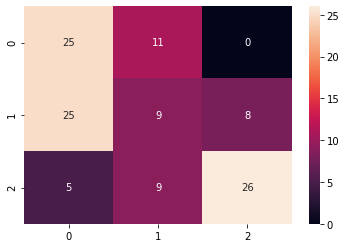

In [274]:
# Confusion Matrix Görselleştirme
sns.heatmap(cm,annot=True)

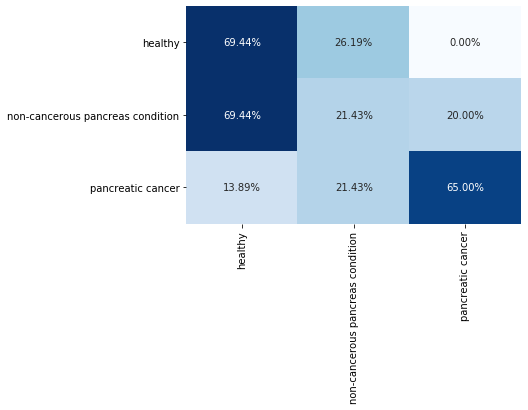

In [275]:
class_adlari=["healthy","non-cancerous pancreas condition","pancreatic cancer"] # 0:normal 1:diabet
sns.heatmap(cm/cm.sum(axis=1),annot=True,cbar=False,cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

In [276]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [277]:
import keras
print(keras.__version__)

2.5.0
